In [3]:
import opendatasets as od

# Replace the link with your Kaggle dataset link
dataset_link = "https://www.kaggle.com/datasets/msambare/fer2013"

# Download the dataset
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: apoorvadatir
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013


100%|██████████| 60.3M/60.3M [00:00<00:00, 247MB/s]


***This is a image dataset so adding a download here for anyone to download from kaggle, just create one token on kaggle and when propted here add your username and token to get the API.***

---














In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.losses import CategoricalCrossentropy
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy,F1Score,Precision,Recall
from tensorflow.keras.layers import Conv2D,Input,MaxPool2D,Dense,BatchNormalization,Flatten,Dropout,GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [7]:
path="/content/fer2013/train/happy" #change the path according to your folder structure
sample_files=[os.path.join(path,i) for i in os.listdir(path)]

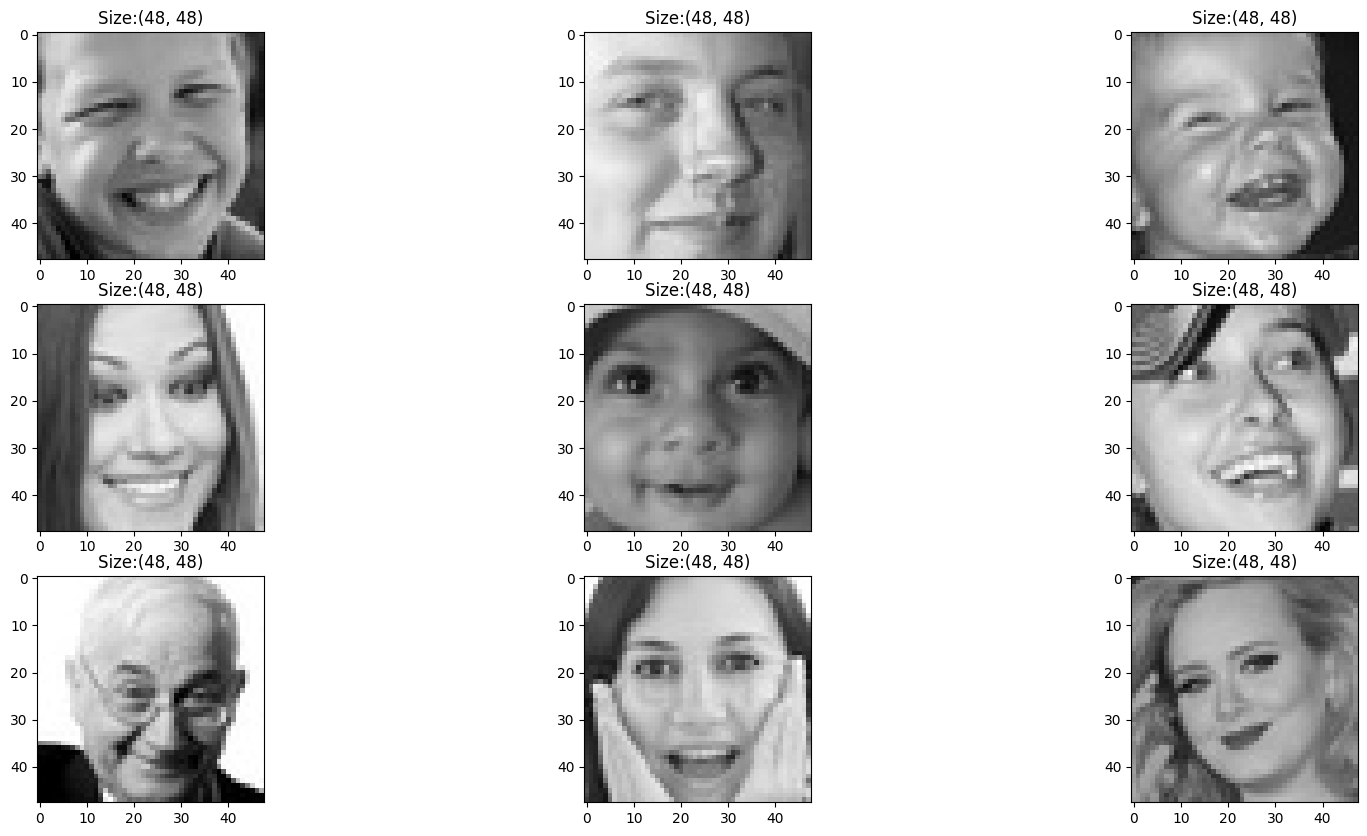

In [8]:
fig,axis=plt.subplots(3,3,figsize=(20,10))
axis=axis.flatten()
count=0
rand_indices=np.random.randint(0,len(sample_files),size=(9,1)).flatten()
for i in range(len(rand_indices)):
    image=load_img(sample_files[rand_indices[i]])
    axis[count].imshow(image)
    axis[count].set_title("Size:"+str(image.size))
    count+=1

In [21]:
CONFIG={
    "BATCH_SIZE":32,
    "IMG_SIZE":(48,48),
    "STRIDE_1":1,
    "STRIDE_2":2,
    "REGUL":0.001,
    "DROP_OUT":0.2,
    "DENSE_L1":1024,
    "DENSE_L2":512,
    "DENSE_L3":256,
    "DENSE_L4":128,
    "KERNEL_SIZE_3":(3,3),
    "KERNEL_SIZE_2":(5,5),
    "KERNEL_SIZE_1":(7,7),
    "LR":0.001,
    "CLASS_NAMES":['anger','disgust','fear','happy','neutral','sad','surprise'],
    "POOL_SIZE":(2,2),
    "train_path":"/content/fer2013/train",
    "test_path":"/content/fer2013/test",
    "FILTERS":32

}

In [22]:
train_img_gen=ImageDataGenerator(rescale=1/255.0,shear_range=0.2,zoom_range=0.2,validation_split=0.2)

In [23]:
test_img_gen=ImageDataGenerator(rescale=1/255.0,shear_range=0.2,zoom_range=0.2)

In [24]:
train_gen=train_img_gen.flow_from_directory(directory=CONFIG["train_path"],subset='training',target_size=CONFIG["IMG_SIZE"],batch_size=CONFIG['BATCH_SIZE'],shuffle=True,class_mode='categorical',color_mode='grayscale')

Found 22968 images belonging to 7 classes.


In [25]:
test_gen=test_img_gen.flow_from_directory(directory=CONFIG["test_path"],target_size=CONFIG["IMG_SIZE"],batch_size=CONFIG['BATCH_SIZE'],shuffle=True,class_mode='categorical',color_mode='grayscale')

Found 7178 images belonging to 7 classes.


In [26]:
val_gen=train_img_gen.flow_from_directory(directory=CONFIG["train_path"],subset='validation',target_size=CONFIG["IMG_SIZE"],batch_size=CONFIG['BATCH_SIZE'],shuffle=True,class_mode='categorical',color_mode='grayscale')

Found 5741 images belonging to 7 classes.


In [27]:
x,y=next(train_gen)

In [28]:
images=x
labels=np.argmax(y,axis=-1)

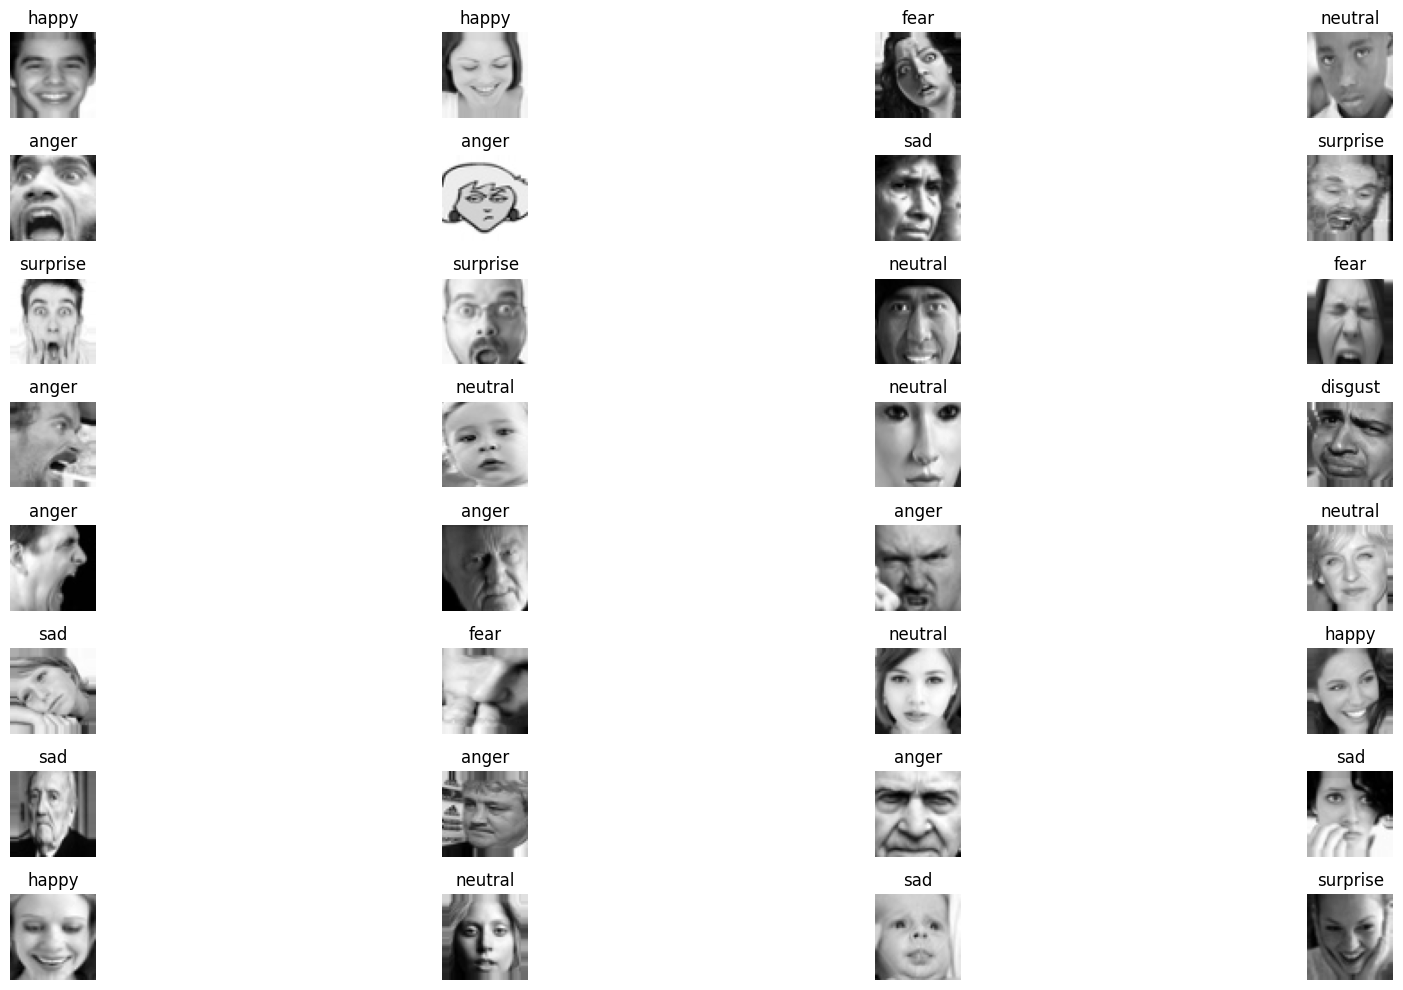

In [29]:
fig,axis=plt.subplots(8,4,figsize=(20,10))
axis=axis.flatten()
count=0
for i in range(len(labels)):

    axis[count].imshow(images[i],cmap='gray')
    title=CONFIG['CLASS_NAMES'][labels[i]]
    axis[count].set_title(title)
    axis[count].axis('off')
    count+=1

plt.tight_layout()

***Result : Here is the classificaltion and detection of all the emotions in the image dataset***

In [30]:
def get_model(input_shape=(48,48,1),no_of_labels=7):
    tf.keras.backend.clear_session()
    i=Input(shape=input_shape)
    #First
    x=Conv2D(filters=CONFIG["FILTERS"],kernel_size=CONFIG['KERNEL_SIZE_3'],activation='relu',strides=CONFIG['STRIDE_1'],padding='valid')(i)
    x=BatchNormalization()(x)
    x=MaxPool2D(pool_size=CONFIG['POOL_SIZE'],strides=CONFIG['STRIDE_2'])(x)

    #Second
    x=Conv2D(filters=CONFIG["FILTERS"]*2,kernel_size=CONFIG['KERNEL_SIZE_3'],activation='relu',strides=CONFIG['STRIDE_1'],padding='valid',kernel_regularizer=l2(CONFIG['REGUL']))(x)
    x=BatchNormalization()(x)
    x=MaxPool2D(pool_size=CONFIG['POOL_SIZE'],strides=CONFIG['STRIDE_2'])(x)

    #Third
    x=Conv2D(filters=CONFIG["FILTERS"]*4,kernel_size=CONFIG['KERNEL_SIZE_3'],activation='relu',strides=CONFIG['STRIDE_1'],padding='valid')(x)
    x=BatchNormalization()(x)
    x=MaxPool2D(pool_size=CONFIG['POOL_SIZE'],strides=CONFIG['STRIDE_2'])(x)



    x=Flatten()(x)


    x=Dense(units=CONFIG["DENSE_L2"],activation='relu')(x)
    x=Dropout(rate=CONFIG["DROP_OUT"])(x)


    x=Dense(no_of_labels,activation='softmax',name='last_layer')(x)

    return Model(i,x)

In [31]:
model=get_model()

In [32]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ last_layer (Dense)                   │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,146,247 (4.37 MB)

 Trainable params: 1,145,799 (4.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [33]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=Adam(learning_rate=CONFIG['LR']))

In [34]:
steps_per_epoch=22968//CONFIG['BATCH_SIZE']
validation_steps=5741//CONFIG["BATCH_SIZE"]

In [35]:
from sklearn.utils.class_weight import compute_class_weight

In [36]:
class_labels=train_gen.classes
classes=np.unique(class_labels)

In [37]:
weights=compute_class_weight(class_weight='balanced',classes=classes,y=class_labels)
weight_dict=dict(enumerate(weights))

In [38]:
callbacks=[ModelCheckpoint(filepath='/kaggle/working/checked_model.keras',monitor='val_loss',mode='min',save_best_only=True)]


In [40]:
model.fit(train_gen,batch_size=CONFIG['BATCH_SIZE'],callbacks=callbacks,class_weight=weight_dict,epochs=10,validation_data=val_gen,steps_per_epoch=steps_per_epoch,validation_steps=validation_steps)


Epoch 1/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 133s 185ms/step - accuracy: 0.4435 - loss: 1.4335 - val_accuracy: 0.3333 - val_loss: 1.8138
Epoch 2/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 67us/step - accuracy: 0.2812 - loss: 1.5207 - val_accuracy: 0.0769 - val_loss: 2.4922
Epoch 3/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 135s 189ms/step - accuracy: 0.4542 - loss: 1.4165 - val_accuracy: 0.4658 - val_loss: 1.4097
Epoch 4/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 51us/step - accuracy: 0.4375 - loss: 1.2881 - val_accuracy: 0.3077 - val_loss: 1.8937
Epoch 5/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 132s 184ms/step - accuracy: 0.4999 - loss: 1.2985 - val_accuracy: 0.4141 - val_loss: 1.5639
Epoch 6/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 50us/step - accuracy: 0.5625 - loss: 2.0282 - val_accuracy: 0.3846 - val_loss: 1.5030
Epoch 7/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 133s 186ms/step - accuracy: 0.5130 - loss: 1.2397 - val_accuracy: 0.4042 - val_loss: 1.5610
Epoch 8/10
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 49us/step - accuracy: 0.6562 - loss: 1.044